# 1. install the required packages

Installs several libraries that are necessary for financial data analysis, reinforcement learning, and data processing. Each package serves a unique purpose:

- yfinance: A Python library that allows users to easily download historical market data from Yahoo Finance. It is widely used for retrieving financial data such as stock prices, which is essential for many trading algorithms and financial analyses.

- stable-baselines3: A reinforcement learning (RL) library that provides various implementations of RL algorithms (like DQN, PPO, and A2C). It’s particularly useful for developing, training, and testing RL models for tasks such as automated trading or gaming agents.

- gym: A toolkit developed by OpenAI to create and manage RL environments. It provides a wide variety of environments (e.g., games, simulations) that RL agents can interact with and learn from. In finance, gym can be used to create custom trading environments where agents learn to buy, sell, or hold stocks.

- numpy: A fundamental library for numerical computations in Python. It provides high-performance tools to handle arrays and matrices, which are frequently used in data processing and algorithm development.

- pandas: A powerful library for data manipulation and analysis. It provides data structures (like DataFrames) that make it easy to work with structured data, particularly useful for handling large datasets, performing transformations, and running analytics.

- matplotlib: A popular plotting library in Python for creating static, animated, and interactive visualizations. In financial analysis, matplotlib is used for plotting stock price data, performance metrics, and other visual representations of trading strategies.

- ta-lib: Technical Analysis Library, which includes common technical analysis indicators (like moving averages, RSI, MACD). This library is useful for feature engineering in finance applications, as these indicators often play a crucial role in developing trading strategies.

**Purpose**

By installing these packages, the code sets up a development environment that is suitable for implementing and testing reinforcement learning models on financial data. This environment is particularly useful for tasks like algorithmic trading, where technical indicators and historical market data are used to train RL agents that can make trading decisions.

In [1]:
# 1. install the required packages
!pip install yfinance stable-baselines3 gym numpy pandas matplotlib
!pip install ta-lib

  Using cached TA-Lib-0.4.32.tar.gz (368 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
Failed to build ta-lib


  error: subprocess-exited-with-error
  
  × Building wheel for ta-lib (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> [12 lines of output]
      <string>:75: UserWarning: Cannot find ta-lib library, installation may fail.
      running bdist_wheel
      running build
      running build_py
      creating build\lib.win-amd64-cpython-311\talib
      copying talib\abstract.py -> build\lib.win-amd64-cpython-311\talib
      copying talib\deprecated.py -> build\lib.win-amd64-cpython-311\talib
      copying talib\stream.py -> build\lib.win-amd64-cpython-311\talib
      copying talib\__init__.py -> build\lib.win-amd64-cpython-311\talib
      running build_ext
      building 'talib._ta_lib' extension
      error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERR

# 2. Download the dow jones 30 stocks data

#### Overview
This code retrieves historical price data for stocks in the Dow Jones Industrial Average (DJIA) from Yahoo Finance. It stores the data in a Python dictionary for in-memory access and saves each stock’s data to separate CSV files, enabling both immediate use within Python and persistent storage for external or offline analysis.

#### Imports
- `yfinance` is used to download historical financial data from Yahoo Finance, making it simple to access price and volume data for multiple stocks over specified date ranges.
- `pandas` is imported for data manipulation, as it offers convenient methods to handle, structure, and save data in formats like DataFrames and CSV files.

#### List of Tickers
A list of ticker symbols representing the 30 stocks in the DJIA is defined. These symbols (e.g., 'AAPL' for Apple, 'MSFT' for Microsoft) represent the companies whose historical data will be retrieved. The code uses this list to loop through each stock and download its data.

#### Function: `get_data(tickers)`
The function `get_data` is designed to download and structure historical price data for each ticker in the Dow Jones 30. It accepts a list of ticker symbols as input and performs the following steps:

1. **Initialize an empty dictionary**: The dictionary `stock_data` will hold each ticker’s data as a separate entry, making it easy to retrieve data by ticker symbol.

2. **Loop through each ticker**: The function iterates over the provided list of ticker symbols, fetching historical price data for each.

3. **Download data for each ticker**: Using `yf.download`, the function fetches daily stock data (including open, close, high, low prices, and volume) from Yahoo Finance, starting from January 1, 2009, and ending on May 8, 2020. This data is stored as a DataFrame within the dictionary, with each DataFrame containing the historical data for a specific stock.

4. **Store data in the dictionary**: Each DataFrame is added to `stock_data`, with the ticker symbol as the key. This allows quick and direct access to each stock’s data by its ticker symbol.

5. **Return the data**: After downloading data for all stocks, the function returns the `stock_data` dictionary. This dictionary structure allows easy reference and in-memory manipulation of stock data for analysis.

#### Data Retrieval
The function `get_data` is called with the list of DJIA ticker symbols, populating `stock_data` with DataFrames containing historical stock data for each ticker. This step is essential for obtaining all stock data in a structured format that can be used immediately for analysis within Python.

#### Saving Data to CSV
After populating the `stock_data` dictionary, each DataFrame within the dictionary is saved to a separate CSV file. The key steps involved are:

1. **Iterate over each dictionary entry**: Each ticker and its corresponding DataFrame are accessed in a loop, allowing access to individual stock data.

2. **Save each DataFrame to a CSV file**: The DataFrame for each stock is saved as a CSV file named after its ticker symbol (e.g., `AAPL.csv`, `MSFT.csv`). This creates a local file for each stock’s historical data, preserving it for future use outside of Python and making it accessible for other tools or offline analysis.

#### Purpose
This setup enables quick and efficient access to historical price data for the Dow Jones 30 stocks, either for in-memory processing within Python or for storage in CSV files for offline use. The dictionary structure allows flexible data manipulation within Python, while the CSV files provide a persistent record that can be shared or used by other applications. This approach is particularly useful in financial analysis workflows, where historical stock data serves as a foundation for tasks like trend analysis, technical indicator calculation, or machine learning model training.

In [2]:
import yfinance as yf
import pandas as pd

# List of stocks in the Dow Jones 30
tickers = [
    'MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DOW',
    'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE',
    'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WBA', 'WMT', 'XOM'
]

# Get historical data from Yahoo Finance and save it to dictionary
def get_data(tickers):
    stock_data = {}
    for ticker in tickers:
        df = yf.download(ticker, start="2009-01-01", end="2020-05-08")
        stock_data[ticker] = df
    return stock_data

# Call the function to get data
stock_data = get_data(tickers)

# Save data to CSV file (optional)
for ticker, df in stock_data.items():
    df.to_csv(f'{ticker}.csv')


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

# 3. Load the data from the CSV files

#### Overview
This code loads historical price data for each stock in the Dow Jones 30 from pre-saved CSV files, splits the data into training, validation, and test sets based on specified time ranges, and organizes these subsets for use in model training and evaluation. Additionally, it checks the shape (row and column count) of the data for a sample ticker to ensure that each subset is properly defined.

#### Imports
- **pandas** is imported to facilitate data loading, manipulation, and time-based indexing. It provides a flexible way to manage structured data in DataFrames and perform time-based filtering, making it ideal for handling historical stock data.

#### List of Tickers and Benchmark
A list of ticker symbols for the 30 Dow Jones stocks is defined, along with a **benchmark symbol** (`^DJI`) for the Dow Jones Industrial Average. This benchmark is often used for comparison against individual stock performance or portfolio returns.

#### Data Loading from CSV
The `stock_data` dictionary is created to store each ticker’s historical data loaded from CSV files. For each ticker symbol in the `tickers` list:
1. The code reads the corresponding CSV file using `pd.read_csv`, specifying `Date` as the index column.
2. The `parse_dates=True` argument automatically converts the `Date` column into a datetime format, which allows for time-based indexing.
3. Each DataFrame is added to `stock_data` under its ticker symbol, making `stock_data` a dictionary where each key-value pair represents a ticker and its historical price data.

#### Splitting Data into Training, Validation, and Test Sets
Three time ranges are defined to split the historical data for each stock:
- **Training Data Range**: From January 1, 2009, to December 31, 2015.
- **Validation Data Range**: From January 1, 2016, to December 31, 2016.
- **Test Data Range**: From January 1, 2017, to May 8, 2020.

These ranges are intended to:
1. Provide a large initial set of data for model training.
2. Separate data for validation, enabling model performance tuning without compromising the test data.
3. Reserve the test data for final model evaluation to assess generalization.

Three dictionaries—`training_data`, `validation_data`, and `test_data`—are created to store data subsets for each stock:
- For each ticker, the respective DataFrame in `stock_data` is filtered based on the defined date ranges.
- Each filtered DataFrame is then stored in the corresponding dictionary (`training_data`, `validation_data`, or `test_data`) under the ticker symbol.

#### Data Shape Verification
For verification, the code checks the shapes (i.e., row and column counts) of the training, validation, and test sets for a sample stock, 'AAPL' (Apple Inc.). This check ensures that each subset contains the expected number of data points, confirming the proper split of historical data for the defined time ranges.

#### Displaying Data Sample
Finally, the first five rows of Apple Inc.'s historical data are displayed to give an initial view of the dataset, including columns such as `Open`, `High`, `Low`, `Close`, `Volume`, and `Adj Close`. This step provides a preview of the structure and content of the data, which helps verify that it has been loaded correctly.

### Purpose
The setup provides a structured way to manage, split, and preview stock data for the Dow Jones 30, allowing for efficient data handling in a machine learning workflow. By dividing the data into training, validation, and test sets, it enables a robust approach to model training, hyperparameter tuning, and evaluation, ensuring that the final model is tested on unseen data.

In [3]:
import pandas as pd

# List of stocks in the Dow Jones 30
tickers = [
    'MMM', 'AXP', 'AAPL', 'BA', 'CAT', 'CVX', 'CSCO', 'KO', 'DIS', 'DOW',
    'GS', 'HD', 'IBM', 'INTC', 'JNJ', 'JPM', 'MCD', 'MRK', 'MSFT', 'NKE',
    'PFE', 'PG', 'TRV', 'UNH', 'UTX', 'VZ', 'V', 'WBA', 'WMT', 'XOM'
]

# ticker of benchmark
benchmark = '^DJI'

# Get the data from the CSV files
stock_data = {}
for ticker in tickers:
    df = pd.read_csv(f'{ticker}.csv', index_col='Date', parse_dates=True)
    stock_data[ticker] = df


# split the data into training, validation and test sets
training_data_time_range = ('2009-01-01', '2015-12-31')
validation_data_time_range = ('2016-01-01', '2016-12-31')
test_data_time_range = ('2017-01-01', '2020-05-08')

# split the data into training, validation and test sets
training_data = {}
validation_data = {}
test_data = {}

for ticker, df in stock_data.items():
    training_data[ticker] = df.loc[training_data_time_range[0]:training_data_time_range[1]]
    validation_data[ticker] = df.loc[validation_data_time_range[0]:validation_data_time_range[1]]
    test_data[ticker] = df.loc[test_data_time_range[0]:test_data_time_range[1]]

# print shape of training, validation and test data
ticker = 'AAPL'
print(f'Training data shape for {ticker}: {training_data[ticker].shape}')
print(f'Validation data shape for {ticker}: {validation_data[ticker].shape}')
print(f'Test data shape for {ticker}: {test_data[ticker].shape}')

# Display the first 5 rows of the data
stock_data['AAPL'].head()

Training data shape for AAPL: (1762, 6)
Validation data shape for AAPL: (252, 6)
Test data shape for AAPL: (842, 6)


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2009-01-02,3.067143,3.251429,3.041429,3.241071,2.737004,746015200
2009-01-05,3.327500,3.435000,3.311071,3.377857,2.852516,1181608400
2009-01-06,3.426786,3.470357,3.299643,3.322143,2.805467,1289310400
2009-01-07,3.278929,3.303571,3.223571,3.250357,2.744846,753048800
2009-01-08,3.229643,3.326786,3.215714,3.310714,2.795816,673500800


# 4. Add technical indicators to the data

#### Overview
The `add_technical_indicators` function calculates and adds several technical indicators to a stock price DataFrame. These indicators provide insights into stock price trends, momentum, and volatility, which are commonly used in technical analysis to make trading decisions. The indicators added include the Relative Strength Index (RSI), Moving Average Convergence Divergence (MACD), Commodity Channel Index (CCI), and Average Directional Index (ADX).

#### Imports
- **pandas** is used for DataFrame operations and rolling window calculations.
- **numpy** is used for numerical operations, such as conditionally selecting data and calculating absolute differences.

#### Parameters
- `df`: A pandas DataFrame containing stock data with columns such as `Open`, `High`, `Low`, `Close`, and `Volume`. These columns provide the necessary data to calculate the technical indicators.

#### Technical Indicators Calculated

1. **Relative Strength Index (RSI)**
   - RSI is a momentum indicator that measures the magnitude of recent price changes to evaluate overbought or oversold conditions in a stock.
   - The function calculates RSI based on a 14-period window:
     - It first computes the daily price change (`delta`) for the closing price.
     - Positive and negative changes are separated and smoothed using a rolling average.
     - The RSI value is then computed and added to the DataFrame under the column `RSI`.

2. **Exponential Moving Averages (EMA) and Moving Average Convergence Divergence (MACD)**
   - MACD is a trend-following momentum indicator that shows the relationship between two EMAs of the stock’s closing prices.
   - The function calculates:
     - A 12-period EMA (`EMA12`) and a 26-period EMA (`EMA26`).
     - MACD as the difference between these two EMAs.
     - A 9-period EMA of the MACD line as the "Signal" line, used to identify potential buy or sell signals.
   - These values are added to the DataFrame as `MACD` and `Signal`.

3. **Commodity Channel Index (CCI)**
   - CCI is used to identify cyclical trends in a stock. It compares the current price level to an average price level over a specified period.
   - The function calculates CCI based on a 20-period window:
     - The Typical Price (`tp`) is calculated as the average of `High`, `Low`, and `Close`.
     - The 20-period Simple Moving Average (SMA) of the Typical Price is computed.
     - The mean deviation is also calculated over the 20-period window.
     - CCI is derived and added to the DataFrame under the column `CCI`.

4. **Average Directional Index (ADX)**
   - ADX is a trend strength indicator used to quantify the strength of a trend.
   - The function calculates ADX based on a 14-period window:
     - It calculates directional movements (`+DM` and `-DM`) based on changes in `High` and `Low` prices.
     - The True Range (`tr`) is determined, and the Average True Range (ATR) is calculated using an EMA over 14 periods.
     - The Directional Indicators (`+DI` and `-DI`) are then computed and used to derive the Directional Movement Index (`dx`).
     - The ADX is calculated as the EMA of the `dx` over a 14-period window and added to the DataFrame under the column `ADX`.

#### Data Cleanup
The function drops any rows with NaN values that may arise from rolling calculations and then filters the DataFrame to retain only the essential columns for analysis, namely `Open`, `High`, `Low`, `Close`, `Volume`, `MACD`, `Signal`, `RSI`, `CCI`, and `ADX`.

#### Returns
The function returns a modified DataFrame that includes the original stock data columns (`Open`, `High`, `Low`, `Close`, and `Volume`) along with the calculated technical indicators. This enriched DataFrame can be used in further analysis or machine learning models for trading strategies or other financial analyses.

#### Purpose
By calculating these technical indicators and appending them to the DataFrame, the function enables a comprehensive analysis of stock data. These indicators allow for identifying potential trends, entry/exit points, and trend strength, making them invaluable tools in technical analysis and algorithmic trading strategies.

In [4]:
import pandas as pd
import numpy as np

def add_technical_indicators(df):
    # calculate RSI 14 
    delta = df['Close'].diff()
    up = delta.where(delta > 0, 0)
    down = -delta.where(delta < 0, 0)
    rs = up.rolling(window=14).mean() / down.rolling(window=14).mean()
    df['RSI'] = 100 - (100 / (1 + rs))

    # Tính toán EMA 12 và 26 kỳ cho MACD
    df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=26, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['Signal'] = df['MACD'].ewm(span=9, adjust=False).mean()
    
    # Tính toán RSI 14 kỳ
    delta = df['Close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
    rs = gain / loss
    df['RSI'] = 100 - (100 / (1 + rs))
    
    # Tính toán CCI 20 kỳ
    tp = (df['High'] + df['Low'] + df['Close']) / 3
    sma_tp = tp.rolling(window=20).mean()
    mean_dev = tp.rolling(window=20).apply(lambda x: np.mean(np.abs(x - x.mean())))
    df['CCI'] = (tp - sma_tp) / (0.015 * mean_dev)
    
    # Tính toán ADX 14 kỳ
    high_diff = df['High'].diff()
    low_diff = df['Low'].diff()
    df['+DM'] = np.where((high_diff > low_diff) & (high_diff > 0), high_diff, 0)
    df['-DM'] = np.where((low_diff > high_diff) & (low_diff > 0), low_diff, 0)
    tr = pd.concat([df['High'] - df['Low'], np.abs(df['High'] - df['Close'].shift(1)), np.abs(df['Low'] - df['Close'].shift(1))], axis=1).max(axis=1)
    atr = tr.ewm(span=14, adjust=False).mean()
    df['+DI'] = 100 * (df['+DM'].ewm(span=14, adjust=False).mean() / atr)
    df['-DI'] = 100 * (df['-DM'].ewm(span=14, adjust=False).mean() / atr)
    dx = 100 * np.abs(df['+DI'] - df['-DI']) / (df['+DI'] + df['-DI'])
    df['ADX'] = dx.ewm(span=14, adjust=False).mean()

    # drop NaN values
    df.dropna(inplace=True)

    # keep Open, High, Low, Close, Volume, MACD, Signal, RSI, CCI, ADX
    df = df[['Open', 'High', 'Low', 'Close', 'Volume', 'MACD', 'Signal', 'RSI', 'CCI', 'ADX']]

    return df


#### Overview
This code applies the `add_technical_indicators` function to each stock’s training, validation, and test data, enriching them with various technical indicators. By doing this, each subset of data (training, validation, and test) is prepared for analysis or model training with consistent features, enabling the model to make informed predictions based on technical signals.

#### Adding Technical Indicators

The code iterates over each stock’s data in the training, validation, and test sets, calling the `add_technical_indicators` function on each DataFrame. This function adds several key technical indicators to the data, including:
- **RSI** (Relative Strength Index) – an indicator of momentum.
- **MACD** (Moving Average Convergence Divergence) – a trend-following momentum indicator.
- **CCI** (Commodity Channel Index) – a trend indicator.
- **ADX** (Average Directional Index) – a measure of trend strength.

By adding these indicators to each subset, the code prepares the data for analysis or machine learning tasks by incorporating features that represent stock price behavior and trends.

1. **Training Data**: The code iterates over the `training_data` dictionary, applying `add_technical_indicators` to each DataFrame associated with a ticker symbol. The enriched DataFrame is stored back in `training_data`, ensuring that the training set contains all necessary technical indicators.

2. **Validation Data**: Similarly, the code iterates over the `validation_data` dictionary, applying `add_technical_indicators` to each stock's DataFrame. This step ensures that the validation set contains the same features as the training set, enabling consistent evaluation of model performance.

3. **Test Data**: Finally, the code applies `add_technical_indicators` to each stock’s DataFrame in the `test_data` dictionary. This ensures that the test set is also enriched with the same technical indicators, allowing for accurate and consistent performance assessment after training and tuning the model.

#### Data Shape Verification
To confirm the shape and integrity of the data, the code checks the number of rows and columns in the `AAPL` DataFrame for each subset (training, validation, and test) after adding technical indicators. This provides a quick check to ensure that the transformations were applied correctly and that each subset has the expected number of features (columns) and data points (rows).

#### Purpose
By applying the `add_technical_indicators` function to each data subset, the code ensures that training, validation, and test data have consistent technical features, crucial for building and evaluating predictive models. This setup enables a streamlined analysis of stock data across different time periods while using consistent technical indicators to understand stock trends and behaviors.

In [5]:

# add technical indicators to the training data for each stock
for ticker, df in training_data.items():
    training_data[ticker] = add_technical_indicators(df)

# add technical indicators to the validation data for each stock
for ticker, df in validation_data.items():
    validation_data[ticker] = add_technical_indicators(df)

# add technical indicators to the test data for each stock
for ticker, df in test_data.items():
    test_data[ticker] = add_technical_indicators(df)

# print the first 5 rows of the data
print('Shape of training data for AAPL:', training_data['AAPL'].shape)
print('Shape of validation data for AAPL:', validation_data['AAPL'].shape)
print('Shape of test data for AAPL:', test_data['AAPL'].shape)

C:\Users\Suvashin\AppData\Local\Temp\ipykernel_2420\412413641.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['RSI'] = 100 - (100 / (1 + rs))
C:\Users\Suvashin\AppData\Local\Temp\ipykernel_2420\412413641.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['EMA12'] = df['Close'].ewm(span=12, adjust=False).mean()
C:\Users\Suvashin\AppData\Local\Temp\ipykernel_2420\412413641.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

Shape of training data for AAPL: (1743, 10)
Shape of validation data for AAPL: (233, 10)
Shape of test data for AAPL: (823, 10)


C:\Users\Suvashin\AppData\Local\Temp\ipykernel_2420\412413641.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CCI'] = (tp - sma_tp) / (0.015 * mean_dev)
C:\Users\Suvashin\AppData\Local\Temp\ipykernel_2420\412413641.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['+DM'] = np.where((high_diff > low_diff) & (high_diff > 0), high_diff, 0)
C:\Users\Suvashin\AppData\Local\Temp\ipykernel_2420\412413641.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

# 5. Create Trading Environment

#### Overview
The `StockTradingEnv` class creates a custom environment for stock trading using the Gymnasium framework, allowing reinforcement learning (RL) agents to interact with historical stock data by taking actions like buying or selling shares. This environment enables agents to learn trading strategies by balancing account values, holding or selling shares, and maximizing net worth over time.

#### Dependencies
- **gymnasium**: Provides tools for RL environments, allowing interaction between the agent and environment.
- **numpy** and **pandas**: Used for handling data arrays, calculations, and managing historical stock price data.

#### Class Attributes
- **stock_data**: A dictionary containing historical stock price data (DataFrames) for each ticker.
- **tickers**: A list of stock tickers available for trading in the environment.
- **transaction_cost_percent**: A percentage representing the cost of each transaction (buy or sell), accounting for trading fees or slippage.

#### `__init__` Method
Initializes the environment with essential settings:
1. **Load Stock Data**: Stores non-empty DataFrames in `self.stock_data` and tracks the list of available tickers.
2. **Define Action and Observation Spaces**:
   - **Action Space**: A continuous `Box` space with values ranging from -1 to 1 for each ticker. Positive values represent buying actions, while negative values represent selling actions.
   - **Observation Space**: A `Box` space that includes:
     - Stock data (prices and features) for each ticker,
     - Account balance,
     - Shares held,
     - Net worth,
     - Maximum net worth,
     - Current step in the data.
3. **Initialize Account and Trading State**:
   - Sets up the initial balance, net worth, max net worth, shares held, and sales metrics.
4. **Set Current Step and Max Steps**: Determines the length of the historical data for each stock, setting `max_steps` based on the shortest available data.

#### `reset` Method
Resets the environment to its initial state for a new episode:
- Resets account balance, net worth, max net worth, shares held, total shares sold, and total sales value.
- Resets the `current_step` to 0, and generates the initial observation.

#### `_next_observation` Method
Generates the observation vector for the agent:
- **Stock Data**: Adds the stock price features for each ticker at the current step.
- **Account Information**: Adds the balance, shares held for each stock, net worth, max net worth, and the current step.
- **Frame**: Compiles all information into a single frame for agent input, ensuring consistency in the observation space.

#### `step` Method
Simulates a single step in the environment:
1. **Increment Step**: Advances the current step by 1.
2. **End Check**: Checks if the current step exceeds `max_steps`.
3. **Action Execution**:
   - For each ticker, fetches the current price and performs the action (buy or sell) based on the action space values.
   - Updates balance, shares held, and transaction cost based on the action taken.
4. **Net Worth Calculation**: Updates the `net_worth` by summing balance and the value of held shares, then adjusts `max_net_worth` if it has increased.
5. **Reward Calculation**: Defines the reward as the difference between the current `net_worth` and the initial balance.
6. **Return Observation**: Returns the updated observation, reward, done flag (indicating episode completion), and additional info.

#### `render` Method
Displays the current state of the environment, including:
- **Step**: Current step in the episode.
- **Balance**: Available balance for trading.
- **Shares Held**: Number of shares held for each ticker.
- **Net Worth**: Total net worth of the account.
- **Profit**: Difference between net worth and initial balance.

#### `close` Method
Defines an empty method for closing the environment, included for compatibility with Gymnasium’s environment interface.

#### `update_stock_data` Method
Updates the environment with new stock data, allowing flexibility for testing different data or periods:
1. **Set New Stock Data**: Replaces `self.stock_data` with the new data and updates `self.tickers`.
2. **Recalculate Observation Space**: Adjusts `self.obs_shape` based on the new data dimensions.
3. **Reset Max Steps**: Sets `max_steps` based on the length of new data.
4. **Update Transaction Cost**: Changes the transaction cost if a new value is provided.
5. **Reset Environment**: Resets the environment to its initial state.

### Purpose
The `StockTradingEnv` class provides a framework for training RL agents on stock trading. By simulating trading actions with historical stock data and managing balances, shares, and net worth, this environment enables agents to learn effective trading strategies. With adjustable data inputs and observation spaces, the environment can be adapted to different stocks or timeframes, making it a flexible tool for financial RL training.

In [6]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pandas as pd

class StockTradingEnv(gym.Env):
    metadata = {'render_modes': ['human']}
    
    def __init__(self, stock_data, transaction_cost_percent=0.005):
        super(StockTradingEnv, self).__init__()
        
        # Remove any empty DataFrames
        self.stock_data = {ticker: df for ticker, df in stock_data.items() if not df.empty}
        self.tickers = list(self.stock_data.keys())
        
        if not self.tickers:
            raise ValueError("All provided stock data is empty")
        
        # Calculate the size of one stock's data
        sample_df = next(iter(self.stock_data.values()))
        self.n_features = len(sample_df.columns)
        
        # Define action and observation space
        self.action_space = spaces.Box(low=-1, high=1, shape=(len(self.tickers),), dtype=np.float32)
        
        # Observation space: price data for each stock + balance + shares held + net worth + max net worth + current step
        self.obs_shape = self.n_features * len(self.tickers) + 2 + len(self.tickers) + 2
        self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.obs_shape,), dtype=np.float32)
        
        # Initialize account balance
        self.initial_balance = 1000
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}
        
        # Set the current step
        self.current_step = 0
        
        # Calculate the minimum length of data across all stocks
        self.max_steps = max(0, min(len(df) for df in self.stock_data.values()) - 1)

        # Transaction cost
        self.transaction_cost_percent = transaction_cost_percent
    
    def reset(self, seed=None, options=None):
        super().reset(seed=seed)
        self.balance = self.initial_balance
        self.net_worth = self.initial_balance
        self.max_net_worth = self.initial_balance
        self.shares_held = {ticker: 0 for ticker in self.tickers}
        self.total_shares_sold = {ticker: 0 for ticker in self.tickers}
        self.total_sales_value = {ticker: 0 for ticker in self.tickers}
        self.current_step = 0
        return self._next_observation(), {}
    
    def _next_observation(self):
        # initialize the frame
        frame = np.zeros(self.obs_shape)
        
        # Add stock data for each ticker
        idx = 0
        # Loop through each ticker
        for ticker in self.tickers:
            # Get the DataFrame for the current ticker
            df = self.stock_data[ticker]
            # If the current step is less than the length of the DataFrame, add the price data for the current step
            if self.current_step < len(df):
                frame[idx:idx+self.n_features] = df.iloc[self.current_step].values
            # Otherwise, add the last price data available
            elif len(df) > 0:
                frame[idx:idx+self.n_features] = df.iloc[-1].values
            # Move the index to the next ticker
            idx += self.n_features

        # Add balance, shares held, net worth, max net worth, and current step
        frame[-4-len(self.tickers)] = self.balance # Balance
        frame[-3-len(self.tickers):-3] = [self.shares_held[ticker] for ticker in self.tickers] # Shares held
        frame[-3] = self.net_worth # Net worth
        frame[-2] = self.max_net_worth # Max net worth
        frame[-1] = self.current_step # Current step
        
        return frame
    
    def step(self, actions):
        # update the current step
        self.current_step += 1
        
        # check if we have reached the maximum number of steps
        if self.current_step > self.max_steps:
            return self._next_observation(), 0, True, False, {}
        
        current_prices = {}
        # Loop through each ticker and perform the action
        for i, ticker in enumerate(self.tickers):
            # Get the current price of the stock
            current_prices[ticker] = self.stock_data[ticker].iloc[self.current_step]['Close']
            # get the action for the current ticker
            action = actions[i]
            
            if action > 0:  # Buy
                # Calculate the number of shares to buy
                shares_to_buy = int(self.balance * action / current_prices[ticker])
                # Calculate the cost of the shares
                cost = shares_to_buy * current_prices[ticker]
                # Transaction cost
                transaction_cost = cost * self.transaction_cost_percent
                # Update the balance and shares held
                self.balance -= (cost + transaction_cost)
                # Update the total shares sold
                self.shares_held[ticker] += shares_to_buy

            elif action < 0:  # Sell
                # Calculate the number of shares to sell
                shares_to_sell = int(self.shares_held[ticker] * abs(action))
                # Calculate the sale value
                sale = shares_to_sell * current_prices[ticker]
                # Transaction cost
                transaction_cost = sale * self.transaction_cost_percent
                # Update the balance and shares held
                self.balance += (sale - transaction_cost)
                # Update the total shares sold
                self.shares_held[ticker] -= shares_to_sell
                # Update the shares sold
                self.total_shares_sold[ticker] += shares_to_sell
                # Update the total sales value
                self.total_sales_value[ticker] += sale
        
        # Calculate the net worth
        self.net_worth = self.balance + sum(self.shares_held[ticker] * current_prices[ticker] for ticker in self.tickers)
        # Update the max net worth
        self.max_net_worth = max(self.net_worth, self.max_net_worth)
        # Calculate the reward
        reward = self.net_worth - self.initial_balance
        # Check if the episode is done
        done = self.net_worth <= 0 or self.current_step >= self.max_steps
        
        obs = self._next_observation()
        return obs, reward, done, False, {}
    
    def render(self, mode='human'):
        # Print the current step, balance, shares held, net worth, and profit
        profit = self.net_worth - self.initial_balance
        print(f'Step: {self.current_step}')
        print(f'Balance: {self.balance:.2f}')
        for ticker in self.tickers:
            print(f'{ticker} Shares held: {self.shares_held[ticker]}')
        print(f'Net worth: {self.net_worth:.2f}')
        print(f'Profit: {profit:.2f}')

    def close(self):
        pass

def update_stock_data(self, new_stock_data, transaction_cost_percent=None):
    """
    Update the environment with new stock data.

    Parameters:
    new_stock_data (dict): Dictionary containing new stock data,
                           with keys as stock tickers and values as DataFrames.
    """
    # Remove empty DataFrames
    self.stock_data = {ticker: df for ticker, df in new_stock_data.items() if not df.empty}
    self.tickers = list(self.stock_data.keys())

    if not self.tickers:
        raise ValueError("All new stock data are empty")

    # Update the number of features if needed
    sample_df = next(iter(self.stock_data.values()))
    self.n_features = len(sample_df.columns)

    # Update observation space
    self.obs_shape = self.n_features * len(self.tickers) + 2 + len(self.tickers) + 2
    self.observation_space = spaces.Box(low=-np.inf, high=np.inf, shape=(self.obs_shape,), dtype=np.float32)

    # Update maximum steps
    self.max_steps = max(0, min(len(df) for df in self.stock_data.values()) - 1)

    # Update transaction cost if provided
    if transaction_cost_percent is not None:
        self.transaction_cost_percent = transaction_cost_percent

    # Reset the environment
    self.reset()

    print(f"The environment has been updated with {len(self.tickers)} new stocks.")

# 6. Training Model - Ensemble + PPO + A2C + DDPG + SAC + TD3

## Define Functions

#### Overview
This code defines a set of individual reinforcement learning (RL) agents and an ensemble agent that combines their predictions to generate a single action. The individual agents use popular RL algorithms from the `stable-baselines3` library, specifically PPO, A2C, DDPG, SAC, and TD3. The ensemble approach aims to leverage the strengths of each algorithm to create a more robust trading strategy.

#### Dependencies
- **stable-baselines3**: Provides implementations of state-of-the-art RL algorithms.
- **DummyVecEnv**: A wrapper from `stable-baselines3` for handling environments that enables vectorized processing, which is necessary for certain algorithms.

#### Individual Agents

Each RL algorithm is implemented in its own agent class: `PPOAgent`, `A2CAgent`, `DDPGAgent`, `SACAgent`, and `TD3Agent`. These classes train models based on their respective algorithms and can make predictions on observations.

Each agent class follows a similar structure:

1. **`__init__` Method**:
   - Initializes the model with the specified algorithm (e.g., PPO, A2C).
   - Sets the policy type to "MlpPolicy" (multi-layer perceptron), which is a fully connected neural network suited for continuous data.
   - Specifies the environment in which the agent will operate, which is used for training and making predictions.
   - Trains the model with the specified number of `total_timesteps`.

2. **`predict` Method**:
   - Receives an observation from the environment and predicts an action based on the trained model.
   - Returns the action to be executed in the environment.

Each class encapsulates a specific RL model, allowing independent training and action prediction. The trained models can make predictions for observations in real-time trading environments or simulations.

##### Example Agent Classes

- **PPOAgent**: Utilizes the Proximal Policy Optimization (PPO) algorithm, which is robust for policy-based control tasks and is commonly used in trading environments due to its stability and efficiency.
- **A2CAgent**: Uses the Advantage Actor-Critic (A2C) algorithm, a simpler policy-based approach suitable for continuous action spaces.
- **DDPGAgent**: Implements the Deep Deterministic Policy Gradient (DDPG) algorithm, a model-free, off-policy algorithm designed for environments with continuous action spaces.
- **SACAgent**: Uses the Soft Actor-Critic (SAC) algorithm, an entropy-regularized RL approach that promotes exploration, making it robust in complex, uncertain environments.
- **TD3Agent**: Uses the Twin Delayed Deep Deterministic Policy Gradient (TD3) algorithm, a variant of DDPG that reduces overestimation bias in Q-value estimates.

#### Ensemble Agent: `EnsembleAgent`

The `EnsembleAgent` class combines the predictions of all five individual agents, creating an ensemble model that produces a single action based on their averaged outputs. This approach aims to improve the robustness and generalization of the trading strategy by aggregating insights from multiple models.

1. **`__init__` Method**:
   - Receives pre-trained models for each RL algorithm (PPO, A2C, DDPG, SAC, and TD3).
   - Initializes each model as an attribute, allowing access to each model’s `predict` method.

2. **`predict` Method**:
   - Takes an observation and calls each model’s `predict` method to obtain an action.
   - Each individual action is stored in `ppo_action`, `a2c_action`, `ddpg_action`, `sac_action`, and `td3_action`.
   - **Ensemble Action**: Averages the actions from all five models to create a final `ensemble_action`, which represents the combined decision of the ensemble agent.
   - Returns the `ensemble_action` for execution in the environment.

#### Purpose

The individual agent classes and the `EnsembleAgent` provide flexibility in training and deploying different RL algorithms for stock trading. By creating individual models, the approach allows for testing and comparing various strategies in isolation. The `EnsembleAgent`, on the other hand, aggregates predictions from multiple models to produce a robust action that benefits from each algorithm's unique strengths, which is particularly useful in environments with complex, uncertain dynamics like stock trading.

In [7]:
from stable_baselines3 import PPO, A2C, DDPG, SAC, TD3
from stable_baselines3.common.vec_env import DummyVecEnv

# Define Ensemble Agent
class EnsembleAgent:
    def __init__(self, ppo_model, a2c_model, ddpg_model, sac_model, td3_model):
        self.ppo_model = ppo_model
        self.a2c_model = a2c_model
        self.ddpg_model = ddpg_model
        self.sac_model = sac_model
        self.td3_model = td3_model
    
    def predict(self, obs):
        ppo_action, _ = self.ppo_model.predict(obs)
        a2c_action, _ = self.a2c_model.predict(obs)
        ddpg_action, _ = self.ddpg_model.predict(obs)
        sac_action, _ = self.sac_model.predict(obs)
        td3_action, _ = self.td3_model.predict(obs)
        
        # Average the actions
        ensemble_action = np.mean([ppo_action, a2c_action, ddpg_action, sac_action, td3_action], axis=0)
        return ensemble_action
    
# Define PPO Agent
class PPOAgent:
    def __init__(self, env, total_timesteps):
        self.model = PPO("MlpPolicy", env, verbose=1)
        self.model.learn(total_timesteps=total_timesteps)
    
    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action
    
# Define A2C Agent
class A2CAgent:
    def __init__(self, env, total_timesteps):
        self.model = A2C("MlpPolicy", env, verbose=1)
        self.model.learn(total_timesteps=total_timesteps)
    
    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action
    
# Define DDPG Agent
class DDPGAgent:
    def __init__(self, env, total_timesteps):
        self.model = DDPG("MlpPolicy", env, verbose=1)
        self.model.learn(total_timesteps=total_timesteps)
    
    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action
     
# Define SAC Agent
class SACAgent:
    def __init__(self, env, total_timesteps):
        self.model = SAC("MlpPolicy", env, verbose=1)
        self.model.learn(total_timesteps=total_timesteps)
    
    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action
    
# Define TD3 Agent
class TD3Agent:
    def __init__(self, env, total_timesteps):
        self.model = TD3("MlpPolicy", env, verbose=1)
        self.model.learn(total_timesteps=total_timesteps)
    
    def predict(self, obs):
        action, _ = self.model.predict(obs)
        return action

#### Overview
The `create_env_and_train_agents` function sets up a stock trading environment using historical data, trains multiple reinforcement learning (RL) agents (PPO, A2C, DDPG, SAC, TD3), and combines these agents into an ensemble agent. The ensemble agent leverages the strengths of each individual model to produce a more robust trading strategy.

#### Dependencies
- **numpy** and **pandas**: For data handling and manipulation.
- **matplotlib.pyplot**: For plotting results, if needed after training.
- **DummyVecEnv**: A wrapper for vectorizing environments, enabling parallelized training for algorithms that require it.

#### Parameters
- `data`: A dictionary containing historical stock price data for each ticker, which will be used by the `StockTradingEnv` environment.
- `total_timesteps`: The total number of timesteps for which each agent will be trained.

#### Steps

1. **Create the Trading Environment**:
   - Initializes the trading environment (`StockTradingEnv`) with the provided `data` to simulate a stock trading environment.
   - Wraps the environment in `DummyVecEnv`, which allows for vectorized processing. This is required by some stable-baselines3 algorithms and facilitates parallelized execution, making training more efficient.

2. **Train Individual Agents**:
   - Initializes and trains each RL agent (PPO, A2C, DDPG, SAC, and TD3) with the specified number of `total_timesteps`.
   - Each agent’s constructor:
     - Initializes its respective model within the `env` environment.
     - Trains the model by calling the `learn` method with `total_timesteps`.
   - This training phase allows each agent to develop a strategy for trading based on the data provided in the environment.

3. **Create the Ensemble Agent**:
   - Initializes the `EnsembleAgent` by passing each trained agent model (`ppo_agent.model`, `a2c_agent.model`, etc.) to the ensemble.
   - The ensemble agent combines the outputs of all individual agents, creating a final action based on the averaged predictions. This approach improves stability and can help mitigate the limitations of individual models.

4. **Return Trained Agents and Environment**:
   - Returns the environment (`env`) along with each trained agent (`ppo_agent`, `a2c_agent`, `ddpg_agent`, `sac_agent`, `td3_agent`) and the `ensemble_agent`.
   - The returned agents can be used for further evaluation, testing, or live trading simulations.

#### Purpose
The `create_env_and_train_agents` function provides a complete workflow for setting up a trading environment, training multiple agents, and combining them into an ensemble for more robust trading decisions. This structure supports testing different RL models and leveraging an ensemble approach to improve overall performance, making it suitable for complex financial environments with uncertain dynamics.

In [8]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function to create the environment and train the agents
def create_env_and_train_agents(data, total_timesteps):
    # Create the environment using DummyVecEnv with training data
    env = DummyVecEnv([lambda: StockTradingEnv(data)])

    # Train PPO Agent
    ppo_agent = PPOAgent(env, total_timesteps)

    # Train A2C Agent
    a2c_agent = A2CAgent(env, total_timesteps)

    # Train DDPG Agent
    ddpg_agent = DDPGAgent(env, total_timesteps)

    # Train SAC Agent
    sac_agent = SACAgent(env, total_timesteps)

    # Train TD3 Agent
    td3_agent = TD3Agent(env, total_timesteps)

    # Train the ensemble agent
    ensemble_agent = EnsembleAgent(ppo_agent.model, a2c_agent.model, ddpg_agent.model, sac_agent.model, td3_agent.model)

    return env, ppo_agent, a2c_agent, ddpg_agent, sac_agent, td3_agent, ensemble_agent

#### Overview
These functions provide methods for visualizing different aspects of a trading portfolio over time, including balance, net worth, and shares held. These visualizations help in tracking the performance of trading strategies and comparing multiple portfolios.

#### Dependencies
- **matplotlib.pyplot**: Used for plotting portfolio metrics over time, providing a clear view of performance metrics such as balance, net worth, and shares held.

### 1. `visualize_portfolio`

This function visualizes the balance, net worth, and shares held over time in a single figure with multiple subplots.

##### Parameters
- `steps`: A list of time steps (e.g., trading days or simulation steps) to use as the x-axis.
- `balances`: A list or array of balance values corresponding to each time step.
- `net_worths`: A list or array of net worth values over time.
- `shares_held`: A dictionary where keys are ticker symbols, and values are lists/arrays of shares held for each stock over time.
- `tickers`: A list of stock ticker symbols (e.g., ['AAPL', 'MSFT']) being tracked in the portfolio.
- `show_balance`: Boolean to control whether the balance plot is displayed.
- `show_net_worth`: Boolean to control whether the net worth plot is displayed.
- `show_shares_held`: Boolean to control whether the shares held plot is displayed.

##### Plot Structure
- **Subplot 1**: Displays `Balance Over Time` if `show_balance` is `True`.
- **Subplot 2**: Displays `Net Worth Over Time` in orange if `show_net_worth` is `True`.
- **Subplot 3**: Displays `Shares Held Over Time` for each ticker in `tickers` if `show_shares_held` is `True`.

The function uses `plt.subplots` to create a figure with three rows of subplots, one for each metric (balance, net worth, shares held). Each plot includes labels for x and y axes, a title, and a legend for clarity.

##### Purpose
This visualization allows for a comprehensive overview of key portfolio metrics over time, making it easy to monitor how balance, net worth, and shares held vary through the course of a trading period.

### 2. `visualize_portfolio_net_worth`

This function visualizes only the net worth of the portfolio over time.

##### Parameters
- `steps`: A list of time steps to use as the x-axis.
- `net_worths`: A list or array of net worth values corresponding to each time step.

##### Plot Structure
- A single line plot showing `Net Worth Over Time` in orange, labeled and titled accordingly.

##### Purpose
This function is useful for focusing specifically on the portfolio's net worth without other metrics. It allows for a straightforward view of the overall portfolio growth or decline over time, which is critical for assessing strategy effectiveness.

### 3. `visualize_multiple_portfolio_net_worth`

This function visualizes the net worths of multiple portfolios on the same chart, enabling comparison between different strategies or configurations.

##### Parameters
- `steps`: A list of time steps to use as the x-axis.
- `net_worths_list`: A list of lists (or arrays), where each inner list represents the net worth values of a different portfolio over time.
- `labels`: A list of labels for each portfolio, used in the legend to differentiate between them.

##### Plot Structure
- Each portfolio’s net worth is plotted as a separate line on the same chart, with unique colors and labeled based on the `labels` parameter.

##### Purpose
This function is ideal for comparing the performance of multiple portfolios over the same time period. By overlaying net worths from different strategies, it provides a direct visual comparison, making it easy to identify which strategy performed best.

#### Common Purpose Across Functions
Each function provides tools for visualizing critical portfolio metrics, helping traders and analysts monitor performance, analyze trends, and compare different strategies. These visualizations can guide decision-making by providing a clear view of how various metrics evolve over time.

In [9]:
import matplotlib.pyplot as plt

# Function to visualize portfolio changes
def visualize_portfolio(steps, balances, net_worths, shares_held, tickers, show_balance=True, show_net_worth=True, show_shares_held=True):
    fig, axs = plt.subplots(3, figsize=(12, 18))

    # Plot the balance
    if show_balance:
        axs[0].plot(steps, balances, label='Balance')
        axs[0].set_title('Balance Over Time')
        axs[0].set_xlabel('Steps')
        axs[0].set_ylabel('Balance')
        axs[0].legend()

    # Plot the net worth
    if show_net_worth:
        axs[1].plot(steps, net_worths, label='Net Worth', color='orange')
        axs[1].set_title('Net Worth Over Time')
        axs[1].set_xlabel('Steps')
        axs[1].set_ylabel('Net Worth')
        axs[1].legend()

    # Plot the shares held
    if show_shares_held:
        for ticker in tickers:
            axs[2].plot(steps, shares_held[ticker], label=f'Shares Held: {ticker}')
        axs[2].set_title('Shares Held Over Time')
        axs[2].set_xlabel('Steps')
        axs[2].set_ylabel('Shares Held')
        axs[2].legend()

    plt.tight_layout()
    plt.show()

# function to visualize the portfolio net worth
def visualize_portfolio_net_worth(steps, net_worths):
    plt.figure(figsize=(12, 6))
    plt.plot(steps, net_worths, label='Net Worth', color='orange')
    plt.title('Net Worth Over Time')
    plt.xlabel('Steps')
    plt.ylabel('Net Worth')
    plt.legend()
    plt.show()

# function to visualize the multiple portfolio net worths ( same chart )
def visualize_multiple_portfolio_net_worth(steps, net_worths_list, labels):
    plt.figure(figsize=(12, 6))
    for i, net_worths in enumerate(net_worths_list):
        plt.plot(steps, net_worths, label=labels[i])
    plt.title('Net Worth Over Time')
    plt.xlabel('Steps')
    plt.ylabel('Net Worth')
    plt.legend()
    plt.show()

#### Overview
The `test_agent` function evaluates a single agent’s performance in a trading environment over a specified number of test episodes. It tracks key portfolio metrics, including balance, net worth, and shares held for each stock, and optionally visualizes the trading environment's performance after each step.

#### Parameters
- **`env`**: The trading environment in which the agent will operate, such as a `StockTradingEnv` instance.
- **`agent`**: The agent to be tested, which must implement a `predict` method that takes in observations and outputs actions.
- **`stock_data`**: A dictionary containing historical stock price data used in the environment, with keys as ticker symbols and values as data for each stock.
- **`n_tests`**: The number of test steps to run (default is 1000). Each test step represents a single action taken by the agent in the environment.
- **`visualize`**: A Boolean flag to enable (`True`) or disable (`False`) real-time visualization of the environment’s performance at each step.

#### Returns
- **`metrics`**: A dictionary containing the tracked performance metrics over all test steps. It includes:
  - `steps`: A list of steps completed in the test.
  - `balances`: A list of account balances at each step.
  - `net_worths`: A list of net worth values over time.
  - `shares_held`: A dictionary where each key is a stock ticker, and each value is a list of shares held over time for that stock.

#### Function Workflow

1. **Initialize Metrics**:
   - Creates a `metrics` dictionary to store key metrics over each test step:
     - `steps`: Stores the sequence of steps from 0 to `n_tests - 1`.
     - `balances`: Stores the balance values at each step.
     - `net_worths`: Stores net worth values at each step.
     - `shares_held`: Initializes an empty list for each ticker to track the number of shares held over time.

2. **Reset the Environment**:
   - Resets the environment using `env.reset()`, which sets up the initial observation (`obs`) and starts a new episode.

3. **Run Test Steps**:
   - Loops through each step up to `n_tests`:
     - **Store Step Number**: Appends the current step index to `metrics['steps']`.
     - **Agent Action**: Uses the agent’s `predict` method to determine the next action based on the current observation (`obs`).
     - **Environment Update**: Takes a step in the environment with the selected action, updating `obs`, `rewards`, `dones`, and `infos`.
     - **Visualization**: If `visualize` is `True`, calls `env.render()` to display the environment’s current state.

4. **Track Metrics**:
   - Retrieves the environment’s balance, net worth, and shares held attributes:
     - `balance`: Tracks the agent’s cash balance after each action.
     - `net_worth`: Tracks the total net worth (balance plus value of held shares).
     - `shares_held`: Tracks the quantity of each stock held at each step.
   - Appends these values to the respective lists in `metrics`:
     - **Shares Held**: For each ticker in `stock_data`, appends the number of shares held. If a ticker is missing from `shares_held`, a value of 0 is appended.

5. **Handle Episode End**:
   - Checks if the `dones` flag is `True` (i.e., the episode has ended):
     - Resets the environment to start a new episode if the current episode is complete.

#### Purpose
The `test_agent` function evaluates an agent’s performance in a trading environment and provides detailed metrics to assess the effectiveness of the agent’s trading strategy. By collecting and returning key performance indicators like balance, net worth, and shares held, it enables quantitative analysis and comparison of different agents or strategies. The optional visualization offers a real-time view of the agent's decisions, making it suitable for debugging or demonstrating the trading strategy in action.

In [10]:
def test_agent(env, agent, stock_data, n_tests=1000, visualize=False):
    """
    Test a single agent and track performance metrics, with an option to visualize the results.

    Parameters:
    - env: The trading environment.
    - agent: The agent to be tested.
    - stock_data: Data for the stocks in the environment.
    - n_tests: Number of tests to run (default: 1000).
    - visualize: Boolean flag to enable or disable visualization (default: False).

    Returns:
    - A dictionary containing steps, balances, net worths, and shares held.
    """
    # Initialize metrics tracking
    metrics = {
        'steps': [],
        'balances': [],
        'net_worths': [],
        'shares_held': {ticker: [] for ticker in stock_data.keys()}
    }

    # Reset the environment before starting the tests
    obs = env.reset()

    for i in range(n_tests):
        metrics['steps'].append(i)
        action = agent.predict(obs)
        obs, rewards, dones, infos = env.step(action)
        if visualize:
            env.render()

        # Track metrics
        metrics['balances'].append(env.get_attr('balance')[0])
        metrics['net_worths'].append(env.get_attr('net_worth')[0])
        env_shares_held = env.get_attr('shares_held')[0]

        # Update shares held for each ticker
        for ticker in stock_data.keys():
            if ticker in env_shares_held:
                metrics['shares_held'][ticker].append(env_shares_held[ticker])
            else:
                metrics['shares_held'][ticker].append(0)  # Append 0 if ticker is not found

        if dones:
            obs = env.reset()
            
    return metrics


#### Overview
The `test_and_visualize_agents` function tests multiple agents in a trading environment, tracks their performance metrics, and visualizes the net worth of each agent over time. This function allows for easy comparison of the trading performance of various agents, enabling users to evaluate and contrast different trading strategies.

#### Parameters
- **`env`**: The trading environment in which each agent operates, such as a `StockTradingEnv` instance.
- **`agents`**: A dictionary of agents to test, where each key is the agent's name (e.g., 'PPOAgent', 'A2CAgent') and each value is an agent instance implementing a `predict` method.
- **`training_data`**: The historical stock data used by the environment, typically organized as a dictionary where each key is a ticker symbol.
- **`n_tests`**: The number of test steps for each agent (default is 1000). Each step represents a single trading decision made by the agent within the environment.

#### Function Workflow

1. **Initialize Metrics Dictionary**:
   - Creates an empty dictionary, `metrics`, to store each agent’s performance metrics after testing.

2. **Testing Each Agent**:
   - Iterates over each agent in the `agents` dictionary:
     - **Prints Agent Name**: Outputs a message to indicate that testing has started for the current agent.
     - **Calls `test_agent`**: Executes the `test_agent` function for the current agent, passing the environment, agent instance, training data, `n_tests`, and enabling visualization (`visualize=True`).
     - **Store Metrics**: Stores the resulting metrics for each agent in the `metrics` dictionary under the corresponding agent's name.
     - **Print Completion Message**: Outputs a message indicating that testing is complete for the current agent.

3. **Completion Message**:
   - Prints a separator and a message indicating that all agents have been tested.

4. **Extract Net Worth Data for Visualization**:
   - **Net Worths**: Creates a list, `net_worths`, that contains each agent's `net_worths` metrics over time for comparison.
   - **Steps**: Extracts the `steps` data from one of the agents’ metrics (assuming all agents have the same step count for simplicity).

5. **Visualize Net Worth Comparison**:
   - Calls `visualize_multiple_portfolio_net_worth`, passing `steps`, the `net_worths` of each agent, and the list of agent names.
   - This function plots each agent's net worth over time on the same chart, enabling a direct visual comparison of their performance.

#### Purpose
The `test_and_visualize_agents` function provides a structured way to test and compare multiple agents within a trading environment. By aggregating performance metrics and visualizing net worth trends over time, it enables users to assess which agent performs best and gain insights into how each trading strategy behaves. This approach is useful for evaluating the strengths and weaknesses of different algorithms and selecting the most effective trading strategy.

In [11]:
def test_and_visualize_agents(env, agents, training_data, n_tests=1000):
    metrics = {}
    for agent_name, agent in agents.items():
        print(f"Testing {agent_name}...")
        metrics[agent_name] = test_agent(env, agent, training_data, n_tests=n_tests, visualize=True)
        print(f"Done testing {agent_name}!")
    
    print('-'*50)
    print('All agents tested!')
    print('-'*50)

    # Extract net worths for visualization
    net_worths = [metrics[agent_name]['net_worths'] for agent_name in agents.keys()]
    steps = next(iter(metrics.values()))['steps']  # Assuming all agents have the same step count for simplicity

    # Visualize the performance metrics of multiple agents
    visualize_multiple_portfolio_net_worth(steps, net_worths, list(agents.keys()))

#### Overview
The `compare_and_plot_agents` function calculates and compares key financial performance metrics (average return, standard deviation, and Sharpe ratio) for multiple trading agents based on their net worth over time. The function displays these metrics in a table and generates a bar chart to visualize the Sharpe ratio for each agent, providing a quantitative comparison of their performance.

#### Dependencies
- **numpy**: For calculating daily returns, averages, and standard deviations.
- **pandas**: For organizing performance metrics in a DataFrame, facilitating easy sorting and display.
- **matplotlib.pyplot**: For plotting a bar chart of Sharpe ratios.

#### Parameters
- **`agents_metrics`**: A list of dictionaries, where each dictionary contains performance metrics (including `net_worths`) for an agent. Each `net_worths` list represents the agent's net worth over time.
- **`labels`**: A list of strings representing the names of the agents, which will be used as labels in the DataFrame and plot.
- **`risk_free_rate`**: The risk-free rate of return, used to calculate the Sharpe ratio. Defaults to `0.0`.

#### Function Workflow

1. **Define `compare_agents` Inner Function**:
   - This inner function computes average returns, standard deviation, and Sharpe ratio for each agent.
   
   - **Returns**: Calculates the daily returns as the percentage change in net worth between consecutive days.
     - `np.diff(net_worths) / net_worths[:-1]` computes daily returns for each agent.
     - `avg_return` is the average of daily returns.
   - **Standard Deviation**: Calculates the standard deviation of daily returns (`std_return`), a measure of volatility.
   - **Sharpe Ratio**: Computes the Sharpe ratio, a measure of risk-adjusted return:
     - Formula: \(\text{Sharpe Ratio} = \frac{\text{Average Return} - \text{Risk-Free Rate}}{\text{Standard Deviation}}\).
   - Appends each metric (average return, standard deviation, Sharpe ratio) to their respective lists.

   - **Return DataFrame**: Returns a DataFrame (`df`) containing each agent’s metrics with columns for `Agent`, `Return`, `Standard Deviation`, and `Sharpe Ratio`.

2. **Compare Agents and Sort Data**:
   - Calls `compare_agents` to generate the DataFrame of agent metrics.
   - Sorts `df` by `Sharpe Ratio` in descending order to highlight the best-performing agents in terms of risk-adjusted returns.

3. **Display Results**:
   - Displays the sorted DataFrame, showing each agent’s average return, standard deviation, and Sharpe ratio.
   - Provides a clear comparison across agents based on these financial performance indicators.

4. **Visualize Sharpe Ratios**:
   - Plots a bar chart of the Sharpe ratios for each agent, sorted by performance.
   - Titles and labels the chart to facilitate interpretation, allowing for a quick visual comparison of each agent's risk-adjusted performance.

#### Purpose
The `compare_and_plot_agents` function enables users to evaluate multiple trading agents by calculating and comparing essential financial metrics, with a focus on risk-adjusted returns (Sharpe ratio). By displaying both numerical and visual summaries, the function aids in selecting the most effective trading strategies among different agents. This approach is valuable for analyzing the trade-off between risk and return and determining which agent offers the best performance on a risk-adjusted basis.

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def compare_and_plot_agents(agents_metrics, labels, risk_free_rate=0.0):
    # Function to compare returns, standard deviation, and sharpe ratio of agents
    def compare_agents(agents_metrics, labels):
        returns = []
        stds = []
        sharpe_ratios = []

        for metrics in agents_metrics:
            net_worths = metrics['net_worths']
            # Calculate daily returns
            daily_returns = np.diff(net_worths) / net_worths[:-1]
            avg_return = np.mean(daily_returns)
            std_return = np.std(daily_returns)
            sharpe_ratio = (avg_return - risk_free_rate) / std_return

            returns.append(avg_return)
            stds.append(std_return)
            sharpe_ratios.append(sharpe_ratio)

        df = pd.DataFrame({
            'Agent': labels,
            'Return': returns,
            'Standard Deviation': stds,
            'Sharpe Ratio': sharpe_ratios
        })

        return df

    # Compare agents
    df = compare_agents(agents_metrics, labels)
    # Sort the dataframe by sharpe ratio
    df_sorted = df.sort_values(by='Sharpe Ratio', ascending=False)

    # Display the dataframe
    display(df_sorted)

    # Plot bar chart for sharpe ratio
    plt.figure(figsize=(12, 6))
    plt.bar(df_sorted['Agent'], df_sorted['Sharpe Ratio'])
    plt.title('Sharpe Ratio Comparison')
    plt.xlabel('Agent')
    plt.ylabel('Sharpe Ratio')
    plt.show()

: 

## Run 

#### Overview
This workflow consists of two primary steps:
1. **Training multiple reinforcement learning (RL) agents** using historical stock data in a simulated trading environment.
2. **Testing and visualizing** the performance of these agents to compare their effectiveness.

The purpose is to evaluate different trading strategies implemented by each agent and assess their relative performance.

---

### Step 1: Create the Environment and Train the Agents

```python
total_timesteps = 10000
env, ppo_agent, a2c_agent, ddpg_agent, ensemble_agent, sac_agent, td3_agent = create_env_and_train_agents(training_data, total_timesteps)
```

#### Explanation
1. **Set `total_timesteps`**:
   - Specifies the total duration (in steps) for which each agent will be trained within the environment. Here, it is set to 10,000 steps.

2. **Create Environment and Agents**:
   - Calls the `create_env_and_train_agents` function, passing in:
     - **`training_data`**: A dataset containing historical stock price data, which will serve as the basis for training agents.
     - **`total_timesteps`**: The specified training duration.

3. **Inside `create_env_and_train_agents`**:
   - Initializes a stock trading environment (`env`) using `training_data`.
   - Creates and trains six agents in the environment, each using a distinct RL algorithm:
     - **PPO (Proximal Policy Optimization) Agent**
     - **A2C (Advantage Actor-Critic) Agent**
     - **DDPG (Deep Deterministic Policy Gradient) Agent**
     - **SAC (Soft Actor-Critic) Agent**
     - **TD3 (Twin Delayed DDPG) Agent**
     - **Ensemble Agent**: Combines the predictions of the above agents to generate a unified action based on an ensemble approach.
   - Each agent is trained for the specified `total_timesteps`, learning from the environment to make trading decisions.

4. **Return**:
   - After training, the function returns:
     - **`env`**: The environment instance.
     - **Trained agents**: Each of the trained agents (PPO, A2C, DDPG, SAC, TD3, and Ensemble).
   - The agents are now ready to be evaluated in testing.

---

### Step 2: Test & Visualize the Agents

```python
n_tests = 1000
agents = {
    'PPO Agent': ppo_agent,
    'A2C Agent': a2c_agent,
    'DDPG Agent': ddpg_agent,
    'Ensemble Agent': ensemble_agent, 
    'SAC Agent': sac_agent,
    'TD3 Agent': td3_agent
}
test_and_visualize_agents(env, agents, training_data, n_tests=n_tests)
```

#### Explanation

1. **Set `n_tests`**:
   - Defines the number of test steps each agent will execute in the environment to assess their performance. Here, it is set to 1,000 steps.

2. **Organize Agents for Testing**:
   - A dictionary, `agents`, is created where each key is an agent's name (e.g., 'PPO Agent', 'A2C Agent') and each value is the corresponding trained agent instance. This dictionary includes all the agents trained in Step 1, with labels for easy identification.

3. **Test and Visualize Agents**:
   - Calls `test_and_visualize_agents`, passing:
     - **`env`**: The environment instance.
     - **`agents`**: The dictionary of agents to be tested.
     - **`training_data`**: The stock data used to set up the environment.
     - **`n_tests`**: The specified number of test steps.
   
4. **Inside `test_and_visualize_agents`**:
   - Iterates over each agent in the `agents` dictionary:
     - **Testing**:
       - Calls `test_agent` for each agent, which runs the agent in the environment for `n_tests` steps.
       - Collects key performance metrics (e.g., balance, net worth, shares held).
       - If enabled, real-time visualization is provided to observe each agent’s trading actions in the environment.
     - **Data Collection**:
       - The performance metrics (particularly net worth) for each agent are stored to enable comparisons.
   - **Visualize Comparison**:
     - After testing all agents, `test_and_visualize_agents` extracts the net worth data for each agent.
     - Calls `visualize_multiple_portfolio_net_worth` to plot the net worth of each agent over time on the same chart, allowing a clear, visual comparison of their performance.

---

### Purpose
This workflow is designed to:
1. **Train** multiple agents with various RL algorithms in a simulated trading environment based on historical stock data.
2. **Evaluate and compare** the performance of these agents by testing them and visualizing their net worth progression over time.

By analyzing both quantitative and visual data, users can assess the strengths and weaknesses of each RL algorithm. This process aids in selecting the best-performing agent or trading strategy based on the observed metrics and risk-adjusted returns. The ensemble agent offers a unique approach by leveraging the combined predictions of multiple agents, which can potentially lead to more robust trading outcomes.

In [ ]:
# 1. Create the environment and train the agents
total_timesteps = 10000
env, ppo_agent, a2c_agent, ddpg_agent, ensemble_agent, sac_agent, td3_agent = create_env_and_train_agents(training_data, total_timesteps)

# 2. Test & visualize the agents
n_tests = 1000
agents = {
    'PPO Agent': ppo_agent,
    'A2C Agent': a2c_agent,
    'DDPG Agent': ddpg_agent,
    'Ensemble Agent': ensemble_agent, 
    'SAC Agent': sac_agent,
    'TD3 Agent': td3_agent
}
test_and_visualize_agents(env, agents, training_data, n_tests=n_tests)


Using cpu device
-----------------------------
| time/              |      |
|    fps             | 307  |
|    iterations      | 1    |
|    time_elapsed    | 6    |
|    total_timesteps | 2048 |
-----------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 286         |
|    iterations           | 2           |
|    time_elapsed         | 14          |
|    total_timesteps      | 4096        |
| train/                  |             |
|    approx_kl            | 0.006904331 |
|    clip_fraction        | 0.0527      |
|    clip_range           | 0.2         |
|    entropy_loss         | -39.7       |
|    explained_variance   | 1.29e-05    |
|    learning_rate        | 0.0003      |
|    loss                 | 4.37e+07    |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0118     |
|    std                  | 1           |
|    value_loss           | 9.88e+07    |
-----------------

c:\Users\Suvashin\anaconda3\Lib\site-packages\stable_baselines3\common\vec_env\base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Done testing PPO Agent!
Testing A2C Agent...
Done testing A2C Agent!
Testing DDPG Agent...
Done testing DDPG Agent!
Testing Ensemble Agent...
Done testing Ensemble Agent!
Testing SAC Agent...
Done testing SAC Agent!
Testing TD3 Agent...
Done testing TD3 Agent!
--------------------------------------------------
All agents tested!
--------------------------------------------------


# 7. Testing Model - Ensemble + PPO + A2C + DDPG

#### Overview
This workflow involves three steps:
1. **Setting up the environment** using test data for evaluating the agents.
2. **Testing and visualizing** each agent’s performance on the test data.
3. **Comparing the agents' performance** by calculating and visualizing key financial metrics, including average returns, standard deviation, and Sharpe ratio.

---

### Step 1: Create the Environment with Test Data

```python
test_env = DummyVecEnv([lambda: StockTradingEnv(test_data)])
```

1. **Initialize Test Environment**:
   - Uses `DummyVecEnv` to create a vectorized environment (`test_env`), which allows for parallelized processing if needed.
   - **`StockTradingEnv(test_data)`**: This custom environment is instantiated with `test_data`, which is a dataset containing historical price information for the stocks that will be used for testing.

2. **Purpose**:
   - Setting up the environment with `test_data` enables the agents to operate in a different dataset from the training data, allowing for an unbiased evaluation of their generalization and robustness.

---

### Step 2: Test & Visualize Agents on Test Data

```python
n_tests = 1000
test_agents = {
    'PPO Agent': ppo_agent,
    'A2C Agent': a2c_agent,
    'DDPG Agent': ddpg_agent,
    'Ensemble Agent': ensemble_agent,
    'SAC Agent': sac_agent,
    'TD3 Agent': td3_agent
}
test_and_visualize_agents(env, test_agents, test_data, n_tests=n_tests)
```

1. **Set Test Steps**:
   - `n_tests` defines the number of steps each agent will execute in the environment for testing. Here, it is set to 1,000 steps.

2. **Define Agents for Testing**:
   - `test_agents` is a dictionary that associates each agent’s label (e.g., 'PPO Agent', 'A2C Agent') with its corresponding agent instance.
   - Each agent in `test_agents` was previously trained on the training data and is now ready to be evaluated on the test data.

3. **Test and Visualize Agents**:
   - Calls `test_and_visualize_agents` with:
     - **`env`**: The test environment (`test_env`).
     - **`test_agents`**: The dictionary of agents to test.
     - **`test_data`**: The test dataset, used to configure the environment and provide data for the agents.
     - **`n_tests`**: The specified number of test steps.
   - **Inside `test_and_visualize_agents`**:
     - Iterates over each agent in `test_agents` and tests it on the test data.
     - Tracks key performance metrics (e.g., balance, net worth, shares held) for each agent.
     - Visualizes the progression of each agent’s net worth over time, enabling side-by-side comparison in a single plot.

4. **Purpose**:
   - This step allows for real-time testing and visualization of each agent’s behavior on unseen test data, providing insights into each agent’s performance and trading strategy under new conditions.

---

### Step 3: Compare the Agents' Performance on Test Data (Returns, Standard Deviation, and Sharpe Ratio)

```python
test_agents_metrics = [test_agent(env, agent, test_data, n_tests=n_tests, visualize=False) for agent in test_agents.values()]
compare_and_plot_agents(test_agents_metrics, list(test_agents.keys()))
```

1. **Evaluate Each Agent’s Metrics**:
   - For each agent in `test_agents`, the `test_agent` function is called to calculate performance metrics over the `n_tests` steps on the test data.
   - **`visualize=False`**: Disables visualization during metric collection, as this step focuses solely on performance evaluation.

2. **Collect and Compare Metrics**:
   - **`test_agents_metrics`**: A list that stores performance data for each agent, specifically focusing on net worth.
   - Calls `compare_and_plot_agents`, passing:
     - **`test_agents_metrics`**: The list of performance metrics for each agent.
     - **`list(test_agents.keys())`**: The names of the agents, used as labels in the comparison plot.
   - **Inside `compare_and_plot_agents`**:
     - Calculates financial metrics:
       - **Returns**: The average return over all test steps.
       - **Standard Deviation**: Measures the volatility of returns.
       - **Sharpe Ratio**: A measure of risk-adjusted returns, calculated as the ratio of average return to standard deviation.
     - Creates a DataFrame displaying these metrics for each agent.
     - Sorts agents by Sharpe ratio, highlighting the agent with the best risk-adjusted performance.
     - Plots a bar chart to visually compare the Sharpe ratios of the agents.

3. **Purpose**:
   - By calculating and visualizing returns, standard deviation, and Sharpe ratio, this step provides a quantitative basis for comparing the performance of each agent.
   - The Sharpe ratio comparison is particularly valuable for assessing risk-adjusted returns, helping identify the agent with the best balance between return and volatility on test data.

---

### Summary
This workflow provides a comprehensive process for evaluating RL trading agents on test data:
1. **Environment Setup**: Sets up a test environment using unseen data.
2. **Testing and Visualization**: Tests agents and visualizes their net worth progression, allowing for visual comparison.
3. **Metric-Based Comparison**: Quantitatively compares agents based on financial metrics to assess risk-adjusted returns.

This approach allows users to select the most effective trading strategy by comparing the agents’ performance in both visual and quantitative terms, focusing on their ability to generalize and manage risk under new market conditions.

Testing PPO Agent...


/Users/phamtheanh/miniconda3/lib/python3.11/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Done testing PPO Agent!
Testing A2C Agent...
Done testing A2C Agent!
Testing DDPG Agent...
Done testing DDPG Agent!
Testing Ensemble Agent...
Done testing Ensemble Agent!
Testing SAC Agent...
Done testing SAC Agent!
Testing TD3 Agent...
Done testing TD3 Agent!
--------------------------------------------------
All agents tested!
--------------------------------------------------


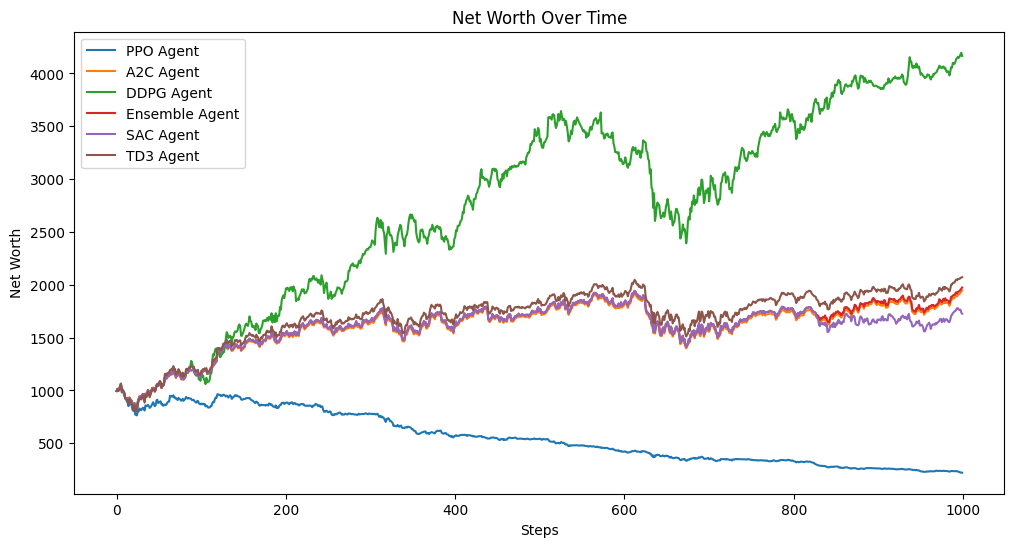

,Agent,Return,Standard Deviation,Sharpe Ratio
2,DDPG Agent,0.001608,0.018658,0.086169
5,TD3 Agent,0.001080,0.017991,0.060010
3,Ensemble Agent,0.000800,0.015101,0.052980
1,A2C Agent,0.000786,0.014974,0.052472
4,SAC Agent,0.000671,0.015512,0.043288
0,PPO Agent,-0.001435,0.012311,-0.116553


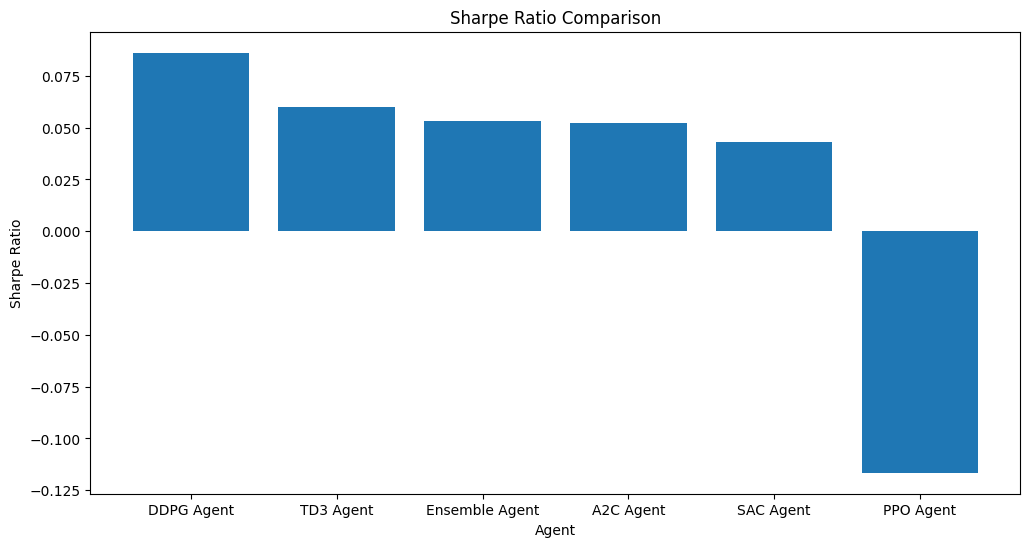

In [17]:
# Create the environment using DummyVecEnv with test data
test_env = DummyVecEnv([lambda: StockTradingEnv(test_data)])

# 2. Test & visualize the agents on the test data
n_tests = 1000
test_agents = {
    'PPO Agent': ppo_agent,
    'A2C Agent': a2c_agent,
    'DDPG Agent': ddpg_agent,
    'Ensemble Agent': ensemble_agent,
    'SAC Agent': sac_agent,
    'TD3 Agent': td3_agent
}
test_and_visualize_agents(env, test_agents, test_data, n_tests=n_tests)

# 3. Compare the agents' performance on the test data ( returns, standard deviation, and sharpe ratio )
test_agents_metrics = [test_agent(env, agent, test_data, n_tests=n_tests, visualize=False) for agent in test_agents.values()]
compare_and_plot_agents(test_agents_metrics, list(test_agents.keys()))